### Questão: Para compras de diferentes categorias ou preços, os adiantamentos e atrasos nas entregas afetam a avaliação dos clientes em relação a compra de maneira distinta?

Ou seja, queremos saber se existem categorias de produtos ou faixas de preço, dentro das quais os clientes tendem a ficarem mais insatisfeitos com atrasos ou satisfeitos com adiantamentos das entregas. Essa pergunta é importante para saber se vendedores de algum tipo específico de produto devem se preocupar mais com o cumprimento dos prazos estimados para as entregas.

Primeiramente para cada compra foi associada a coluna "diferença" indicando a diferença entre a previsão de entrega prevista e a data de entrega efetiva (em dias). Após isso, os dados foram divididos em 5 faixas (com quantidades iguais de compras em cada), de acordo com o preço da compra, sendo A a faixa com menores preços e E a faixa com os maiores preços. Foi então traçado o gráfico da avaliação média dos clientes versus a coluna "diferença", para os dados totais para cada faixa de preço. Foram obtidos os gráficos:

Faixa A: produtos com preço menor que 39 reais. 
<br>
                                          Faixa B: produtos com preço entre 39 e 70 reais.
<br>
                                          Faixa C: produtos com preço entre 70 e 110 reais.
<br>
                                          Faixa D: produtos com preço entre 110 e 170 reais.
<br>
                                          Faixa E: produtos com preço maior que 170 reais.

In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mpl
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
#importando os dados
items=pd.read_csv('olist_order_items_dataset.csv')
orders=pd.read_csv('olist_orders_dataset.csv')
reviews=pd.read_csv('olist_order_reviews_dataset.csv')
products=pd.read_csv('olist_products_dataset.csv')

In [3]:
#ajustando os dados
orders['order_delivered_customer_date']=pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date']=pd.to_datetime(orders['order_estimated_delivery_date'])

In [4]:
#criando a coluna diferença, com a diferença em dias entre a data prevista e a data efetiva de entrega.
orders['diferença']=(orders['order_estimated_delivery_date']- orders['order_delivered_customer_date']).dt.days

In [5]:
#agrupando o preço total de cada pedido, pa a separação em faixas.
prices=pd.DataFrame()
prices['order_id']=items['order_id']
prices['preco_total']=items['price']
prices=prices.groupby('order_id').sum().reset_index()

In [6]:
#criando uma tabela com os dados a serem estudados
estudo=pd.merge(prices, right=reviews[['order_id','review_score']], on ='order_id')
estudo=pd.merge(estudo,right=orders[['diferença','order_id']], on='order_id')
estudo=estudo.sort_values(by='preco_total').reset_index().drop(columns='index')

In [7]:
#separando as ordens em faixas de acordo com o preço
tamanho=len(estudo)
estudo['faixa']=0
for k in range(tamanho):
    if k<=tamanho/5:
        estudo['faixa'][k]='A'
    if tamanho/5<k<=2*tamanho/5:
        estudo['faixa'][k]='B'
    if 2*tamanho/5<k<=3*tamanho/5:
        estudo['faixa'][k]='C'
    if 3*tamanho/5<k<=4*tamanho/5:
        estudo['faixa'][k]='D'
    if 4*tamanho/5<k:
        estudo['faixa'][k]='E'
    


In [8]:
#criando uma tabela que considera todos os dados, independente da faixa, para fazer uma plotagem
#estou calculando o review_score médio para cada valor da diferença entre pazos previstos e efetivos:
estudo_total=pd.DataFrame()
estudo_total['preço_total']=estudo.groupby('diferença')['preco_total'].sum()
estudo_total['review_score']=estudo.groupby('diferença')['review_score'].mean()
estudo_total=estudo_total.reset_index().drop(columns='preço_total')

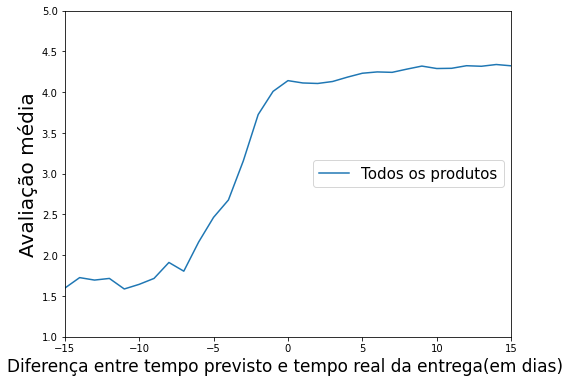

In [9]:
plt.figure(figsize=(8,6));
plt.tight_layout()


plt.axis([-15,15,1,5])
plt.plot(estudo_total['diferença'],estudo_total['review_score'],'-');
plt.legend(['Todos os produtos'], loc=5, prop={'size': 15})
plt.ylabel('Avaliação média', size=20)
plt.xlabel('Diferença entre tempo previsto e tempo real da entrega(em dias) ',size=17);




In [10]:
#criando tabelas similares a anterior, mas de acordo com a faixa de preço da venda.
estudo_A=estudo[estudo['faixa']=='A'].groupby('diferença').mean().reset_index().drop(columns='preco_total')
estudo_B=estudo[estudo['faixa']=='B'].groupby('diferença').mean().reset_index().drop(columns='preco_total')
estudo_C=estudo[estudo['faixa']=='C'].groupby('diferença').mean().reset_index().drop(columns='preco_total')
estudo_D=estudo[estudo['faixa']=='D'].groupby('diferença').mean().reset_index().drop(columns='preco_total')
estudo_E=estudo[estudo['faixa']=='E'].groupby('diferença').mean().reset_index().drop(columns='preco_total')



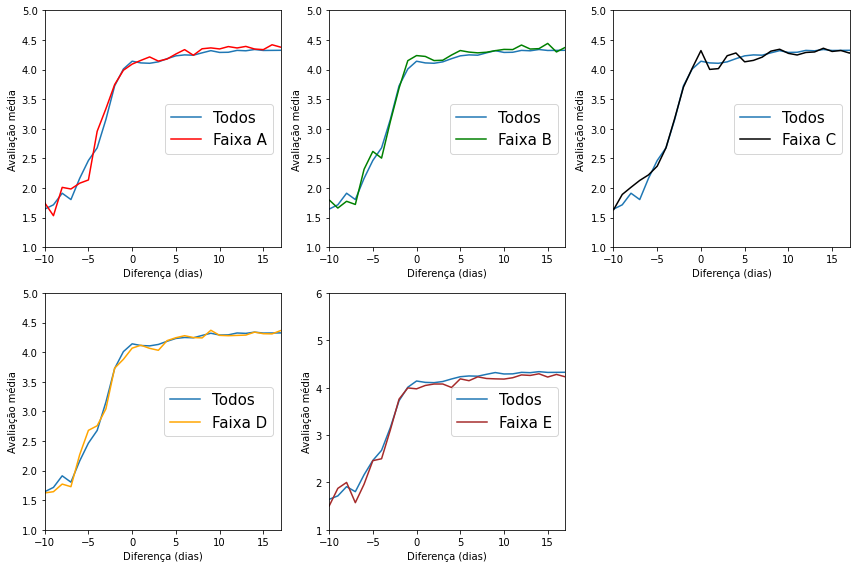

In [11]:
#refazendo o plot, mas colocando os dados totais ao lado dos dados segregados por faixa de preço. 
plt.figure(figsize=(12, 8));
plt.tight_layout()

plt.subplot(2,3,1)

plt.ylabel('Avaliação média', size=10)
plt.xlabel('Diferença entre tempo previsto e tempo real da entrega (em dias)',size=10);


plt.axis([-10,17,1,5])
plt.ylabel('Avaliação média', size=10)
plt.xlabel('Diferença (dias)' ,size=10)
plt.plot(estudo_total['diferença'],estudo_total['review_score'],'-');
plt.plot(estudo_A['diferença'],estudo_A['review_score'],'-',color='red');
plt.legend(['Todos','Faixa A'], loc=5, prop={'size': 15})


plt.subplot(2,3,2)
plt.ylabel('Avaliação média', size=10)
plt.xlabel('Diferença (dias)' ,size=10)
plt.axis([-10,17,1,5])
plt.plot(estudo_total['diferença'],estudo_total['review_score'],'-');
plt.plot(estudo_B['diferença'],estudo_B['review_score'],'-', color='green');
plt.legend(['Todos','Faixa B'], loc=5, prop={'size': 15})

plt.subplot(2,3,3)
plt.axis([-10,17,1,5])
plt.plot(estudo_total['diferença'],estudo_total['review_score'],'-');
plt.plot(estudo_C['diferença'],estudo_C['review_score'],'-', color='black');
plt.legend(['Todos','Faixa C'], loc=5, prop={'size': 15})
plt.ylabel('Avaliação média', size=10)
plt.xlabel('Diferença (dias)' ,size=10)

plt.subplot(2,3,4)
plt.axis([-10,17,1,5])
plt.plot(estudo_total['diferença'],estudo_total['review_score'],'-');
plt.plot(estudo_D['diferença'],estudo_D['review_score'],'-', color='orange');
plt.legend(['Todos','Faixa D'], loc=5, prop={'size': 15})
plt.ylabel('Avaliação média', size=10)
plt.xlabel('Diferença (dias)' ,size=10)


plt.subplot(2,3,5)
plt.axis([-10,17,1,6])
plt.plot(estudo_total['diferença'],estudo_total['review_score'],'-');
plt.plot(estudo_E['diferença'],estudo_E['review_score'],'-',color='brown');
plt.legend(['Todos','Faixa E'], loc=5, prop={'size': 15})
plt.ylabel('Avaliação média', size=10)
plt.xlabel('Diferença (dias)' ,size=10);

plt.tight_layout()

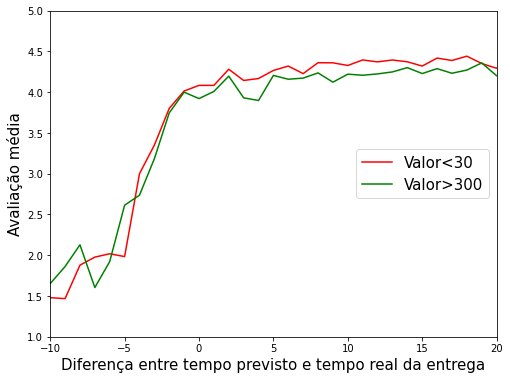

In [22]:
#plotando apenas as faixas <30 e >300
estudo_menos30=estudo[estudo['preco_total']<30].groupby('diferença').mean().reset_index()
estudo_mais300=estudo[estudo['preco_total']>300].groupby('diferença').mean().reset_index()


plt.figure(figsize=(8,6));
plt.tight_layout();
plt.plot()
plt.axis([-10,20,1,5])
plt.plot(estudo_menos30['diferença'],estudo_menos30['review_score'],'-',color='red');
plt.plot(estudo_mais300['diferença'],estudo_mais300['review_score'],'-', color='green');

plt.ylabel('Avaliação média', size=15)
plt.xlabel('Diferença entre tempo previsto e tempo real da entrega',size=15);
plt.legend(['Valor<30','Valor>300','Faixa C','Faixa D','Faixa E'], loc=5, prop={'size': 15});


   Observa-se que não houve diferença muito significativa entre as curvas de cada classe em relação à sensibilidade à atrasos. A nota média recebida aparenta ser ligeiramente maior quanto menor o preço da compra.

In [27]:
#o próximo passo é fazer esta mesma análise, porém com agrupamentos por categoria de produto
#foi criada a tabela 'categorias', onde cada linha é um produto comprado e as colunas são a categoria do produto comprado,
#o review_score e a diferença entre prazos previstos e efetivos para a entrega.
categorias=pd.DataFrame()
categorias[['product_id','product_category_name']]=products[['product_id','product_category_name']]
categorias=pd.merge(categorias, right=items[['product_id','order_id']], on='product_id')
categorias=pd.merge(categorias, right = estudo[['order_id','review_score','diferença']], on='order_id')
categorias=categorias[['product_category_name','review_score','diferença']]


In [28]:
#fiz também um estudo de quais são as categorias com mais dados de vendas cadastradas, para seguir o estudo apenas nas
#categorias com um total de itens vendidos relevante.
totais=pd.DataFrame(columns=['categoria','Itens_totais_vendidos'])
totais['categoria']=categorias['product_category_name'].unique()
for x in range(len(categorias['product_category_name'].unique())):
    totais.iloc[x][1]=categorias['product_category_name'][categorias['product_category_name']==categorias['product_category_name'].unique()[x]].count()
totais_ordenados=totais.sort_values(by='Itens_totais_vendidos',ascending=False).reset_index().drop(columns='index')
totais.sort_values(by='Itens_totais_vendidos',ascending=False)[0:25].reset_index().drop(columns='index')

,categoria,Itens_totais_vendidos
0,cama_mesa_banho,11272
1,beleza_saude,9728
2,esporte_lazer,8701
3,moveis_decoracao,8416
4,informatica_acessorios,7895
5,utilidades_domesticas,6989
6,relogios_presentes,6001
7,telefonia,4550
8,ferramentas_jardim,4361
9,automotivo,4256


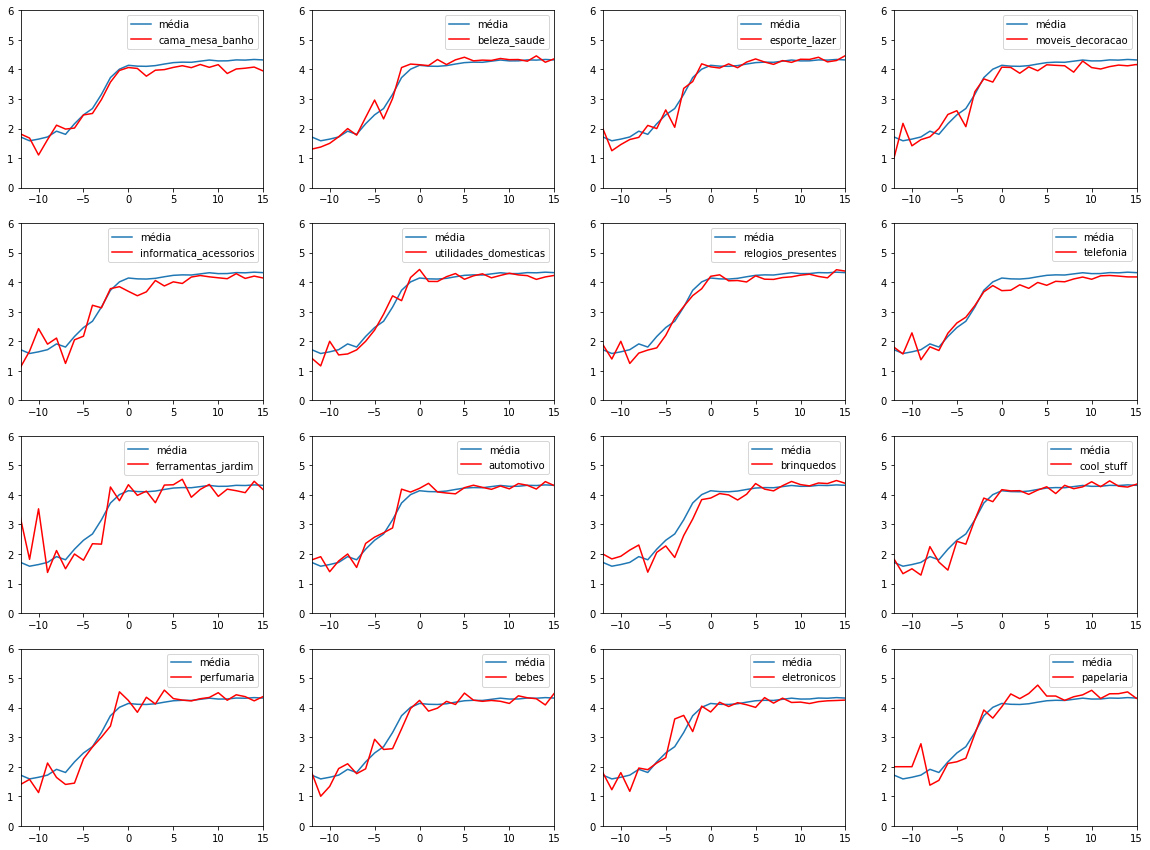

In [29]:
#decidi plotar as 16 primeiras categorias da lista
plt.figure(figsize=(20,15))

for x in range(0,16):
    plt.subplot(4,4,x+1)
    plt.axis([-12,15,0,6])
    plt.plot(estudo_total['diferença'],estudo_total['review_score'],'-');    
    y=categorias[categorias['product_category_name']==totais_ordenados['categoria'][x]]
    y=y.drop(columns='product_category_name')
    y=y.groupby('diferença').mean().reset_index()
    plt.plot(y['diferença'],y['review_score'],'-', color='red');
    plt.legend(['média',totais_ordenados['categoria'][x]]);
    
    

  A categoria brinquedos parace ser mais sensível à atrasos na entrega. Talvez a justificativa seja que brinquedos são dados mais frequentemente como presentes, e presentes muitas vezes são dados em datas especiais (como aniversários), de modo que se essa data é perdida, o valor agregado do produto cai significativamente.
  <br>
  Também nota-se uma média menor para a categoria cama_mesa_banho quando e maior para a categoria papelaria, na região do gráfico onde não há atrasos. Uma possível justificativa para isso pode estar na quantidade média de fotos por anúncio para estas duas categorias, como mostro a seguir

In [30]:
#para finalizar, consultei a quantidade média de fotos por anúncio nas categorias papelaria e cama_mesa_banho.
teste=products[['product_category_name','product_photos_qty']]
teste=teste.groupby('product_category_name').mean().reset_index()
teste[teste['product_category_name'].isin(['papelaria','cama_mesa_banho']) ]

,product_category_name,product_photos_qty
13,cama_mesa_banho,1.392539
59,papelaria,2.698469
